## Лабораторная работа 4.2.2
# Интерферометр Жамена

In [1]:
import numpy as np
import scipy as ps
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

### Калибровка компенсатора

Выполним калибровку компенсатора, выделив узкий интервал длин волн с помощью светофильтра.

In [7]:
data1 = pd.read_excel('lab-422.xlsx', 'table-1')
pd.DataFrame(data1)

,"$z_m, мм$"
0,15.27
1,15.31
2,15.36
3,15.42
4,15.47
5,15.52
6,15.57
7,15.64
8,15.69
9,15.74


In [8]:
l = 100      # Длина кюветы (мм)
Lambda = 650 # Длина волны (нм)

По полученным значениям построим калибровочный график $z_m = f(m)$.

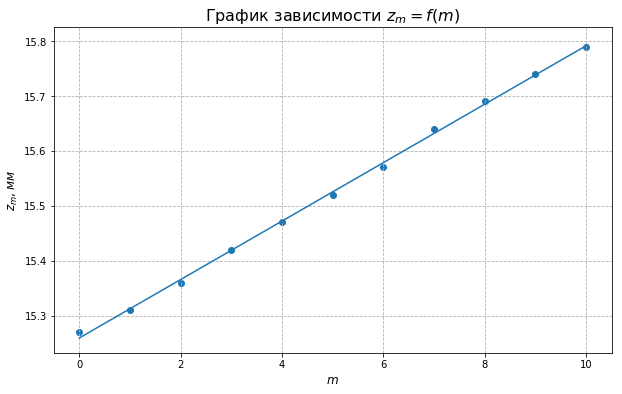

In [24]:
x1 = np.array(range(11))
y1 = np.array(data1.values[:, 0], dtype = float)

k1, b1 = np.polyfit(x1, y1, deg = 1)

plt.figure(figsize = (10, 6))
plt.title('График зависимости $z_m = f(m)$', fontsize=16)
plt.ylabel('$z_m, мм$', fontsize=12)
plt.xlabel('$m$', fontsize=12)

plt.scatter(x1, y1)
plt.plot(x1, x1 * k + b)
plt.grid(linestyle = '--')

plt.show()

In [32]:
print('k1 =', k1, 'мм', '\nb1 =', b1, 'мм')

k1 = 0.0531818181818 мм 
b1 = 15.2595454545 мм


Рассчитаем среднее расстояние между соседними интерференционными полосами.

In [37]:
distance = 0
for i in range(10):
    distance += math.fabs(y1[i] - y1[i + 1])
distance /= 11
print(distance, 'мм')

0.04727272727272724 мм


### Зависимость  $\delta n$ от  $P$ воздуха

Снимем зависимость показаний компенсатора $\Delta z$ от перепада давлений $\Delta P$ и построим по полученным данным график $\Delta z = f(\Delta P)$.

In [69]:
data2 = pd.read_excel('lab-422.xlsx', 'table-2')
pd.DataFrame(data2)

,"$\Delta P, мм H_{2}O$","$z, мм$"
0,-100,15.27
1,0,15.26
2,150,15.22
3,300,15.19
4,450,15.15
5,-250,15.32
6,-350,15.34
7,-500,15.38
8,-650,15.40
9,-750,15.43


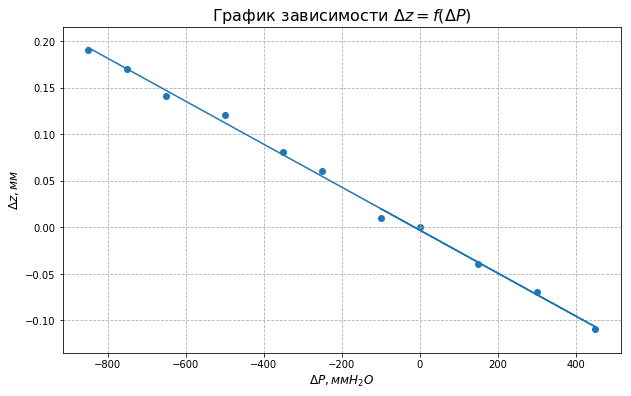

In [70]:
x2 = np.array(data2.values[:, 0], dtype = float)
y2 = np.array(data2.values[:, 1], dtype = float)
y2 = np.array([each - b1 for each in y2])

k2, b2 = np.polyfit(x2, y2, deg = 1)

plt.figure(figsize = (10, 6))
plt.title('График зависимости $\Delta z = f(\Delta P)$', fontsize=16)
plt.ylabel('$\Delta z, мм$', fontsize=12)
plt.xlabel('$\Delta P, мм H_2O$', fontsize=12)

plt.scatter(x2, y2)
plt.plot(x2, x2 * k2 + b2)
plt.grid(linestyle = '--')

plt.show()

In [71]:
print('k2 =', k2)

k2 = -0.000230765503876


Используя формулу $\delta n = \dfrac{\Delta}{l} = m \dfrac{\lambda}{l}$, где $m$ – число полос, на которые сместилась картина, перейдем от делений компенсатора $\Delta z$ к величине $\delta n$.

$\delta n = \dfrac{\Delta z}{d} \dfrac{\lambda}{l}$, $d$ – расстояние между соседними полосами  

Следовательно, $\dfrac{\delta n}{\Delta P} = \dfrac{\Delta z}{\Delta P} \dfrac{\lambda}{dl}$.

In [72]:
result = math.fabs(k2 * Lambda * 10**(-6) / (distance * l * (10**(-2) * 1.0197)))
print(result, '1/Б')

3.1117247016716424e-06 1/Б


Рассчитаем среднюю поляризуемость молекулы: $\alpha = \dfrac{\delta n}{\Delta P} \dfrac{k_Б T}{2 \pi}$

In [73]:
alpha = result * 1.38 * 10**(-16) * (25 + 273.15) / (2 * math.pi) 
print(alpha)

2.0376763229722428e-20
